In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv("Score.csv")
df.head()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,...,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
0,3.0,7.0,4.0,26.822620,265.0,No,80.415295,312.494089,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
1,3.0,7.0,4.0,31.944960,265.0,No,118.280222,284.629162,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
2,3.0,7.0,4.0,28.609352,267.0,No,81.699521,331.209863,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
3,5.0,4.0,4.0,31.377862,268.0,No,199.458074,223.451310,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
4,6.0,4.0,4.0,24.797347,269.0,No,41.420153,341.489231,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Delay_from_due_date,99960.0,21.095718,14.827414,0.000000,10.000000,18.000000,28.000000,67.000000
Num_of_Delayed_Payment,99960.0,13.336345,6.269964,0.000000,9.000000,14.000000,18.000000,28.000000
Num_Credit_Inquiries,99960.0,5.774570,3.862224,0.000000,3.000000,5.000000,8.000000,29.000000
Credit_Utilization_Ratio,99960.0,32.284544,5.116888,20.000000,28.052051,32.305470,36.496305,50.000000
Credit_History_Age,99960.0,221.122819,99.696084,1.000000,144.000000,219.000000,302.000000,404.000000
Amount_invested_monthly,99960.0,193.665219,194.782737,0.000000,73.708522,129.342067,234.323706,1977.326102
Monthly_Balance,99960.0,403.445100,214.387092,0.007760,270.317007,337.237873,471.904834,1602.040519
Age,99960.0,33.269228,10.762371,14.000000,24.000000,33.000000,42.000000,56.000000
Annual_Income,99960.0,50498.704153,38294.243161,7005.930000,19338.480000,36996.830000,71681.400000,179987.280000
Num_Bank_Accounts,99960.0,5.368868,2.591668,0.000000,3.000000,5.000000,7.000000,10.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99960 entries, 0 to 99959
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Delay_from_due_date       99960 non-null  float64
 1   Num_of_Delayed_Payment    99960 non-null  float64
 2   Num_Credit_Inquiries      99960 non-null  float64
 3   Credit_Utilization_Ratio  99960 non-null  float64
 4   Credit_History_Age        99960 non-null  float64
 5   Payment_of_Min_Amount     99960 non-null  object 
 6   Amount_invested_monthly   99960 non-null  float64
 7   Monthly_Balance           99960 non-null  float64
 8   Credit_Score              99960 non-null  object 
 9   Credit_Mix                99960 non-null  object 
 10  Payment_Behaviour         99960 non-null  object 
 11  Age                       99960 non-null  float64
 12  Annual_Income             99960 non-null  float64
 13  Num_Bank_Accounts         99960 non-null  float64
 14  Num_Cr

In [6]:
df['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [7]:
df['Payment_Behaviour'].unique()

array(['High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments',
       'Low_spent_Medium_value_payments'], dtype=object)

In [8]:
df['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [9]:
df['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [10]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Credit_Score'] = le.fit_transform(df['Credit_Score'])

In [11]:
df['Credit_Score'].unique()

array([0, 2, 1])

In [12]:
df = pd.get_dummies(df, columns=['Credit_Mix','Payment_Behaviour','Payment_of_Min_Amount'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99960 entries, 0 to 99959
Data columns (total 30 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Delay_from_due_date                                 99960 non-null  float64
 1   Num_of_Delayed_Payment                              99960 non-null  float64
 2   Num_Credit_Inquiries                                99960 non-null  float64
 3   Credit_Utilization_Ratio                            99960 non-null  float64
 4   Credit_History_Age                                  99960 non-null  float64
 5   Amount_invested_monthly                             99960 non-null  float64
 6   Monthly_Balance                                     99960 non-null  float64
 7   Credit_Score                                        99960 non-null  int32  
 8   Age                                                 99960 non-null  float64


In [14]:
X = df.drop(['Credit_Score'], axis = 1)
y = df['Credit_Score']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.loc[:, :'Monthly_Balance'] = sc.fit_transform(X_train.loc[:, :'Monthly_Balance'])
X_test.loc[:, :'Monthly_Balance'] = sc.transform(X_test.loc[:, :'Monthly_Balance'])
df.loc[:, :'Monthly_Balance'] = sc.transform(df.loc[:, :'Monthly_Balance'])

In [17]:
from xgboost import XGBClassifier
model_1 = XGBClassifier()
model_1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [18]:
y_pred = model_1.predict(X_test)

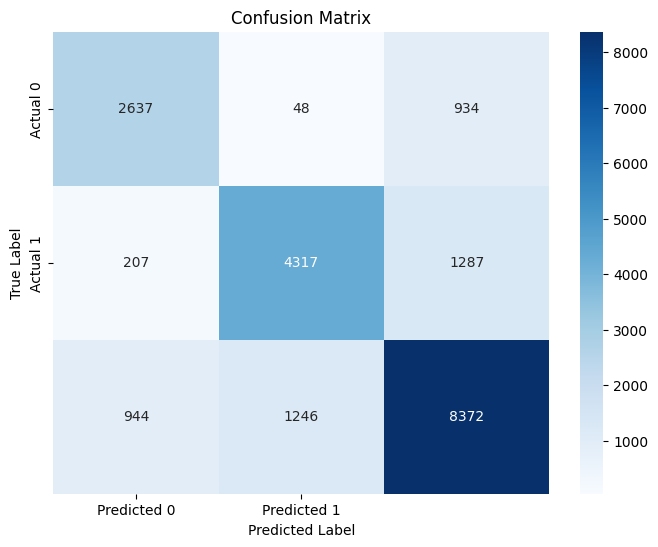

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)

# Create a seaborn heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [20]:
accuracy_score(y_test, y_pred)

0.7666066426570628

In [21]:
Xgboost = calculate_results(y_test, y_pred)

NameError: name 'calculate_results' is not defined

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import xgboost as xgb

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
# Assuming you have trained an XGBoost model and made predictions
# Replace the following line with your actual XGBoost model and predictions
# xgb_model = xgb.XGBClassifier()
# y_pred = xgb_model.predict(X_test)

def calculate_results(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multiclass
    recall = recall_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multiclass
    f1 = f1_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multiclass
    confusion = confusion_matrix(y_true, y_pred)
    
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:")
    print(confusion)
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'confusion_matrix': confusion
    }

# Calculate and display results
Xgboost_results = calculate_results(y_test, y_pred)

Accuracy: 0.7666066426570628
Precision: 0.7671932451346369
Recall: 0.7666066426570628
F1 Score: 0.7667645250282447
Confusion Matrix:
[[2637   48  934]
 [ 207 4317 1287]
 [ 944 1246 8372]]


In [24]:
from sklearn.linear_model import LogisticRegression
model_2 = LogisticRegression()
model_2.fit(X_train, y_train)

C:\Users\onral\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
y_pred = model_2.predict(X_test)

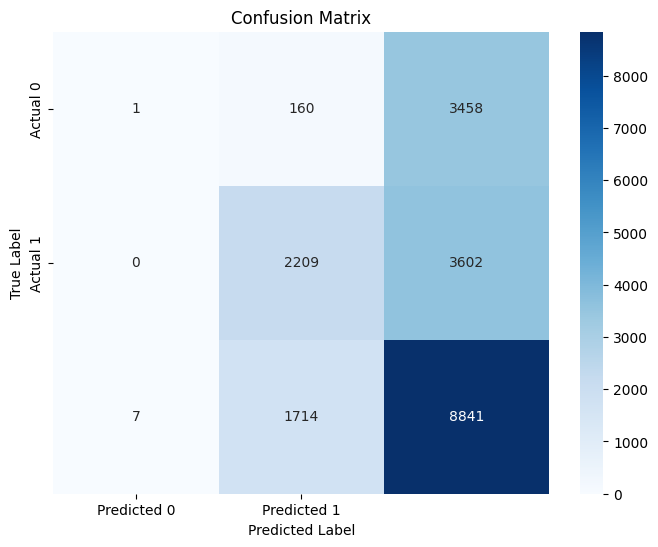

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
# Assuming you have trained a model and made predictions
# Replace the following line with your actual model and predictions
# model = ...  # your model
# y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a seaborn heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [27]:
accuracy_score(y_test, y_pred)

0.5527711084433774

In [28]:
logistic = calculate_results(y_test, y_pred)

Accuracy: 0.5527711084433774
Precision: 0.47362771501127904
Recall: 0.5527711084433774
F1 Score: 0.48289808844953025
Confusion Matrix:
[[   1  160 3458]
 [   0 2209 3602]
 [   7 1714 8841]]


In [29]:
import tensorflow as tf
from tensorflow.keras import layers

model_3 = tf.keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(3, activation='softmax')
])

model_3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [30]:
history = model_3.fit(X_train, y_train, validation_data = (X_test,y_test), epochs = 10)

Epoch 1/10


2499/2499 [==============================] - 5s 2ms/step - loss: 0.9477 - accuracy: 0.5348 - val_loss: 0.9319 - val_accuracy: 0.5277
Epoch 2/10
2499/2499 [==============================] - 4s 2ms/step - loss: 0.9144 - accuracy: 0.5511 - val_loss: 0.9388 - val_accuracy: 0.5773
Epoch 3/10
2499/2499 [==============================] - 4s 2ms/step - loss: 0.9057 - accuracy: 0.5556 - val_loss: 0.9034 - val_accuracy: 0.5319
Epoch 4/10
2499/2499 [==============================] - 4s 2ms/step - loss: 0.9038 - accuracy: 0.5598 - val_loss: 0.9533 - val_accuracy: 0.5282
Epoch 5/10
2499/2499 [==============================] - 4s 2ms/step - loss: 0.8842 - accuracy: 0.5742 - val_loss: 0.8985 - val_accuracy: 0.5469
Epoch 6/10
2499/2499 [==============================] - 4s 2ms/step - loss: 0.8749 - accuracy: 0.5819 - val_loss: 0.9624 - val_accuracy: 0.5305
Epoch 7/10
2499/2499 [==============================] - 4s 1ms/step - loss: 0.8884 - accuracy: 0.5720 - val_loss: 0.9074 - val_accurac

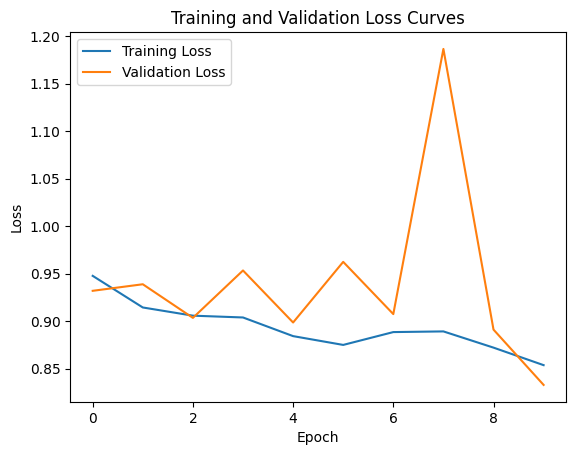

In [31]:

# Assuming 'history' is the object returned by model.fit(...)
# Replace 'history' with the actual variable name used in your code
# For example, history = model.fit(...)

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
# Optionally, plot validation loss if available
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

In [32]:

y_prob = model_3.predict(X_test)
y_pred = tf.argmax(y_prob, axis = 1)

625/625 [==============================] - 1s 794us/step


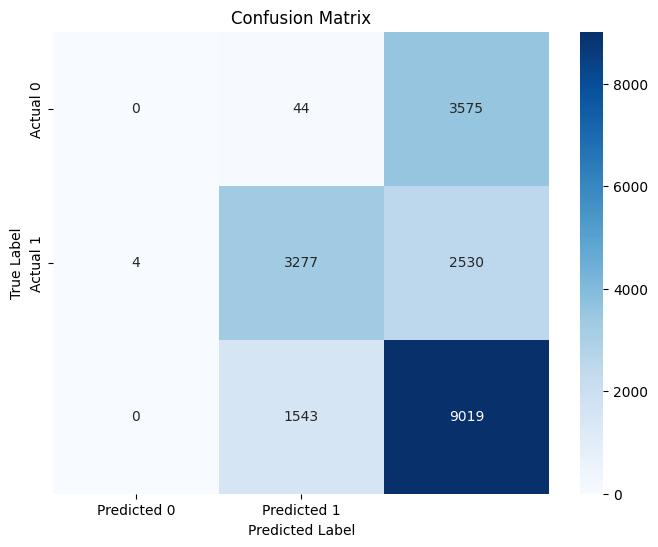

In [33]:
cm = confusion_matrix(y_test, y_pred)

# Create a seaborn heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [34]:
accuracy_score(y_test, y_pred)

0.615046018407363

In [35]:
dnn = calculate_results(y_test, y_pred)

Accuracy: 0.615046018407363
Precision: 0.5108807888257955
Recall: 0.615046018407363
F1 Score: 0.5494635960680069
Confusion Matrix:
[[   0   44 3575]
 [   4 3277 2530]
 [   0 1543 9019]]


In [36]:

from sklearn.ensemble import RandomForestClassifier
model_4 = RandomForestClassifier(n_estimators=1000,criterion='entropy',random_state = 42)
model_4.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=42)

In [37]:
y_pred = model_4.predict(X_test)

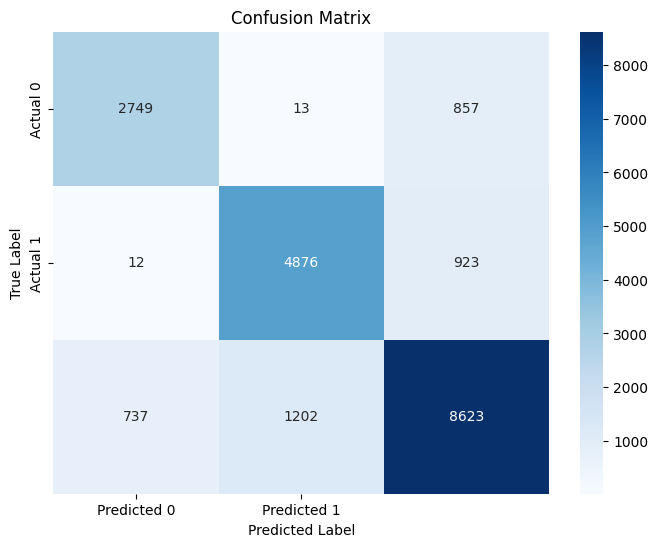

In [38]:
cm = confusion_matrix(y_test, y_pred)

# Create a seaborn heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [39]:
accuracy_score(y_test, y_pred)

0.8127250900360145

In [40]:

random_forest = calculate_results(y_test, y_pred)

Accuracy: 0.8127250900360145
Precision: 0.8128620687735713
Recall: 0.8127250900360145
F1 Score: 0.812596265524638
Confusion Matrix:
[[2749   13  857]
 [  12 4876  923]
 [ 737 1202 8623]]


In [41]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have trained an XGBoost model and made predictions
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgboost = xgb_model.predict(X_test)

# Calculate performance metrics
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
precision_xgboost = precision_score(y_test, y_pred_xgboost, average='weighted')
recall_xgboost = recall_score(y_test, y_pred_xgboost, average='weighted')
f1_xgboost = f1_score(y_test, y_pred_xgboost, average='weighted')
confusion_matrix_xgboost = confusion_matrix(y_test, y_pred_xgboost)

# Create a dictionary or a list with the metrics
Xgboost = {
    'Accuracy': accuracy_xgboost,
    'Precision': precision_xgboost,
    'Recall': recall_xgboost,
    'F1 Score': f1_xgboost,
    'Confusion Matrix': confusion_matrix_xgboost
}

# Now, you can use Xgboost in your DataFrame
model_perf = pd.DataFrame({"XGBoost": Xgboost, "Logistic Regression": logistic, "Deep Neural Network": dnn, "Random Forest": random_forest})


In [42]:
model_perf = model_perf.transpose()

In [43]:
model_perf.sort_values(by=['accuracy'],ascending=False)

,Accuracy,Precision,Recall,F1 Score,Confusion Matrix,accuracy,precision,recall,f1,confusion_matrix
Random Forest,NaN,NaN,NaN,NaN,NaN,0.812725,0.812862,0.812725,0.812596,"[[2749, 13, 857], [12, 4876, 923], [737, 1202,..."
Deep Neural Network,NaN,NaN,NaN,NaN,NaN,0.615046,0.510881,0.615046,0.549464,"[[0, 44, 3575], [4, 3277, 2530], [0, 1543, 9019]]"
Logistic Regression,NaN,NaN,NaN,NaN,NaN,0.552771,0.473628,0.552771,0.482898,"[[1, 160, 3458], [0, 2209, 3602], [7, 1714, 88..."
XGBoost,0.766607,0.767193,0.766607,0.766765,"[[2637, 48, 934], [207, 4317, 1287], [944, 124...",NaN,NaN,NaN,NaN,NaN


In [44]:
df1 = df.copy()

In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99960 entries, 0 to 99959
Data columns (total 30 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Delay_from_due_date                                 99960 non-null  float64
 1   Num_of_Delayed_Payment                              99960 non-null  float64
 2   Num_Credit_Inquiries                                99960 non-null  float64
 3   Credit_Utilization_Ratio                            99960 non-null  float64
 4   Credit_History_Age                                  99960 non-null  float64
 5   Amount_invested_monthly                             99960 non-null  float64
 6   Monthly_Balance                                     99960 non-null  float64
 7   Credit_Score                                        99960 non-null  int32  
 8   Age                                                 99960 non-null  float64


In [46]:
df1['Credit_Score'].value_counts()

2    53149
1    28988
0    17823
Name: Credit_Score, dtype: int64

In [47]:
from pycaret.classification import setup

# Assuming df is your DataFrame
clf1 = setup(data=df, target='Credit_Score', remove_outliers=True, feature_selection=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2547
[LightGBM] [Info] Number of data points in the train set: 66473, number of used features: 29
[LightGBM] [Info] Start training from score -1.742091
[LightGBM] [Info] Start training from score -1.244389
[LightGBM] [Info] Start training from score -0.622262


,Description,Value
0,Session id,3717
1,Target,Credit_Score
2,Target type,Multiclass
3,Original data shape,"(99960, 30)"
4,Transformed data shape,"(96461, 6)"
5,Transformed train set shape,"(66473, 6)"
6,Transformed test set shape,"(29988, 6)"
7,Numeric features,29
8,Preprocess,True
9,Imputation type,simple


In [48]:
from pycaret.classification import compare_models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8096,0.9102,0.8096,0.8096,0.8096,0.6833,0.6833,2.1440
et,Extra Trees Classifier,0.8093,0.8943,0.8093,0.8094,0.8093,0.6830,0.6830,1.7450
dt,Decision Tree Classifier,0.7975,0.8265,0.7975,0.7976,0.7975,0.6638,0.6638,1.1470
knn,K Neighbors Classifier,0.7676,0.8796,0.7676,0.7688,0.7678,0.6169,0.6173,1.4870
xgboost,Extreme Gradient Boosting,0.7250,0.8544,0.7250,0.7245,0.7195,0.5248,0.5292,1.6500
lightgbm,Light Gradient Boosting Machine,0.6841,0.8260,0.6841,0.6840,0.6687,0.4385,0.4502,1.4810
gbc,Gradient Boosting Classifier,0.6539,0.7876,0.6539,0.6507,0.6289,0.3727,0.3905,4.6580
ada,Ada Boost Classifier,0.6252,0.6985,0.6252,0.6150,0.5944,0.3147,0.3345,1.7230
lda,Linear Discriminant Analysis,0.5967,0.7200,0.5967,0.5786,0.5559,0.2485,0.2692,1.2590
ridge,Ridge Classifier,0.5940,0.0000,0.5940,0.5800,0.5293,0.2190,0.2534,1.0770


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [49]:
from pycaret.classification import create_model

# Assuming df is your DataFrame
model_5 = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7724,0.8836,0.7724,0.7730,0.7724,0.6237,0.6240
1,0.7632,0.8774,0.7632,0.7634,0.7633,0.6071,0.6072
2,0.7713,0.8793,0.7713,0.7730,0.7716,0.6241,0.6248
3,0.7640,0.8783,0.7640,0.7648,0.7641,0.6101,0.6105
4,0.7649,0.8794,0.7649,0.7665,0.7652,0.6131,0.6137
5,0.7668,0.8787,0.7668,0.7676,0.7670,0.6148,0.6150
6,0.7725,0.8827,0.7725,0.7744,0.7728,0.6264,0.6271
7,0.7666,0.8814,0.7666,0.7679,0.7669,0.6157,0.6161
8,0.7629,0.8746,0.7629,0.7646,0.7633,0.6100,0.6105


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [50]:
from pycaret.classification import create_model, predict_model
from pycaret.classification import *
predict_model(model_5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.7832,0.8929,0.7832,0.7852,0.7836,0.6442,0.6449


,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Age,Annual_Income,Num_Bank_Accounts,...,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Credit_Score,prediction_label,prediction_score
18116,0.261781,0.105182,0.571079,1.493751,0.331181,-0.236162,0.814573,15.0,80657.843750,7.0,...,0,0,0,0,0,0,1,2,2,1.0
73384,1.610958,-0.213835,0.571079,-1.587998,-0.380479,-0.149464,-0.878788,31.0,20501.720703,7.0,...,0,0,0,1,0,0,1,1,1,0.6
14459,-0.008054,1.062236,-1.496950,-0.265741,0.922561,0.019291,2.857772,49.0,130130.796875,8.0,...,0,0,0,0,0,1,0,2,2,1.0
24802,-0.008054,-0.373344,0.054071,-1.147699,-0.470689,-0.385692,-0.199607,24.0,28263.500000,7.0,...,0,0,0,1,0,0,1,1,1,0.8
65609,-0.008054,0.902727,1.346589,0.262671,-1.092139,-0.196829,-0.448224,30.0,33446.441406,6.0,...,0,0,0,1,0,0,1,2,1,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36495,-0.547725,0.583709,0.312575,1.561742,-0.350409,0.105013,-0.888200,38.0,35996.230469,4.0,...,0,0,0,0,0,0,1,2,2,1.0
31874,-0.615184,0.424200,-0.462936,1.191513,-0.300292,0.260852,-1.054915,36.0,23163.380859,4.0,...,0,0,0,1,0,0,1,2,2,1.0
28850,0.599075,0.743218,-1.238446,0.521810,1.002748,2.098043,-0.011463,29.0,101696.187500,5.0,...,0,0,0,0,0,1,0,2,1,0.8
94729,-0.547725,1.062236,0.571079,-0.125686,-0.320339,2.846949,-0.333267,42.0,85688.492188,8.0,...,0,0,0,0,0,0,1,2,2,0.6


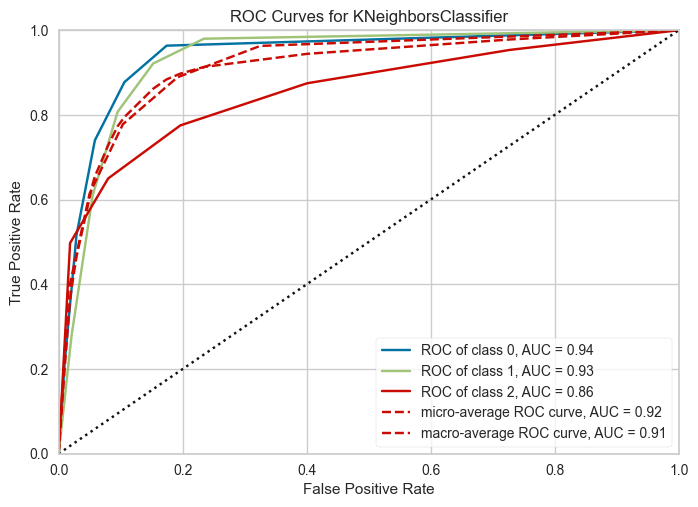

In [51]:

plot_model(model_5, plot = "auc")

In [52]:
final = finalize_model(model_5)

In [53]:
save_model(final, "best credit score model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Delay_from_due_date',
                                              'Num_of_Delayed_Payment',
                                              'Num_Credit_Inquiries',
                                              'Credit_Utilization_Ratio',
                                              'Credit_History_Age',
                                              'Amount_invested_monthly',
                                              'Monthly_Balance', 'Age',
                                              'Annual_Income',
                                              'Num_Bank_Accounts',
                                              'Num_Credit_Card', 'Interest_Rate',
                                              'Num_...
                                                                                          random_state=No

In [54]:
y_pred = model_4.predict(df1)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Credit_Score


In [55]:
y_pred_1 = le.inverse_transform(y_pred)

In [56]:
prediction = pd.DataFrame(y_pred_1, columns = ['Credit score (Predicted)'])

In [57]:
prediction

,Credit score (Predicted)
0,Poor
1,Standard
2,Good
3,Standard
4,Standard
...,...
19987,Poor
19988,Poor
19989,Standard
19990,Poor


In [58]:
results = df1.join(prediction)

In [59]:
results.head(20)

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Credit_Score,Age,Annual_Income,...,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Credit score (Predicted)
0,-1.222314,-1.011380,-0.462936,-1.066659,0.441438,-0.582921,-0.423436,0,23.0,19114.12,...,0,1,0,0,0,0,0,1,0,Poor
1,-1.222314,-1.011380,-0.462936,-0.066662,0.441438,-0.387676,-0.553225,0,23.0,19114.12,...,0,1,0,0,0,0,0,1,0,Standard
2,-1.222314,-1.011380,-0.462936,-0.717848,0.461485,-0.576299,-0.336262,0,23.0,19114.12,...,0,1,0,0,0,0,0,1,0,Good
3,-1.087396,-1.489906,-0.462936,-0.177372,0.471508,0.030906,-0.838177,0,23.0,19114.12,...,0,1,0,0,0,0,0,1,0,Standard
4,-1.019937,-1.489906,-0.462936,-1.462039,0.481532,-0.783994,-0.288383,0,23.0,19114.12,...,0,1,0,0,0,0,0,1,0,Standard
5,-0.885019,-1.489906,-0.462936,-0.980832,0.491555,-0.675659,-0.293087,0,23.0,19114.12,...,0,1,0,0,0,0,0,1,0,Standard
6,-1.222314,-0.851871,-0.462936,-1.903194,0.501579,-0.077966,-0.739833,0,23.0,19114.12,...,0,1,0,0,0,0,0,1,0,Standard
7,-1.222314,-1.170889,-0.462936,-1.630624,0.501579,-0.869770,-0.210901,2,23.0,19114.12,...,0,1,0,0,0,0,0,1,0,Standard
8,-1.222314,-1.489906,-0.979943,-1.527109,0.982701,-0.459806,0.313409,2,28.0,34847.84,...,1,0,0,0,0,0,0,1,0,Standard
9,-0.952478,-1.968433,-0.979943,1.222959,0.992724,-0.789300,0.378155,0,28.0,34847.84,...,1,0,0,0,0,0,0,1,0,Poor


In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import accuracy_score,roc_auc_score,recall_score,precision_score,f1_score
def eval_metric(actual, pred):
    f1 = f1_score(actual, y_pred)
    precision = precision_score(actual, y_pred)
    recall = recall_score(actual, y_pred)
    auc_roc = roc_auc_score(actual, y_pred_prob)
    Accu=accuracy_score(actual, y_pred)
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [61]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2731   13  875]
 [   9 4853  949]
 [ 715 1199 8648]]
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      3619
           1       0.80      0.84      0.82      5811
           2       0.83      0.82      0.82     10562

    accuracy                           0.81     19992
   macro avg       0.81      0.80      0.80     19992
weighted avg       0.81      0.81      0.81     19992

